In [1]:
# Import Libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set Seed
seed = 42
rng = np.random.RandomState(seed)

# Set path variables

csvPath ="./../../CV101/datasets/age_prediction/"
imagePath=csvPath+'images/'
dataFile='train.csv'



In [2]:
! pwd
! ls ./../../CV101/datasets/age_prediction/

/home/jovyan/work/AI-ML-BlackBelt-AnalyticsVidhya/Computer Vision
Archive.zip  images  test.csv  train.csv


In [3]:
print(csvPath + dataFile)

./../../CV101/datasets/age_prediction/train.csv


In [46]:
# Read the data
data = pd.read_csv(csvPath + dataFile)
data.head()


,image_names,age_labels
0,16620.jpg,50
1,9507.jpg,36
2,16666.jpg,43
3,2536.jpg,49
4,9189.jpg,26


The shape of the is (128, 128, 3)
The name of the is 7055.jpg
The age of the person is  30


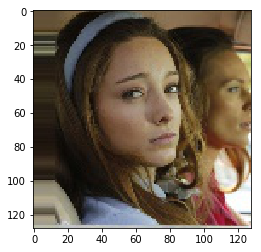

In [5]:

# Read random data and plot it's image
idx = rng.choice(data.index)
img = plt.imread(imagePath + data.image_names.iloc[idx])
fig = plt.figure()
plt.imshow(img)


# Print the shape of image
print('The shape of the is',img.shape)
print('The name of the is',data.image_names.iloc[idx])
print('The age of the person is ',data.age_labels.iloc[idx])
plt.show()



## Load and Pre process the data 

In [6]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [51]:
data_sample = data[:1000]

In [13]:
data.shape

(1000, 2)

In [12]:
data=data_sample

In [14]:
images = []
for img in data.image_names:
    img = image.load_img(imagePath+img,target_size=(224,224,3))
    img = image.img_to_array(img)
    images.append(img)
images= np.array(images)

In [15]:
images.shape

(1000, 224, 224, 3)

In [50]:
X = preprocess_input(images,mode='tf')


NameError: name 'images' is not defined

In [17]:
y = data.iloc[:,1:].values

In [18]:
X_train,X_valid,y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
%who

X	 X_train	 X_valid	 csvPath	 data	 dataFile	 data_sample	 fig	 idx	 
image	 imagePath	 images	 img	 ipython_vars	 np	 pd	 plt	 preprocess_input	 
rng	 seed	 sys	 train_test_split	 y	 y_train	 y_valid	 


In [19]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('X', 602112144),
 ('images', 602112144),
 ('X_train', 421478544),
 ('X_valid', 180633744),
 ('img', 602240),
 ('data', 73544),
 ('data_sample', 73544),
 ('y_train', 5712),
 ('y_valid', 2512),
 ('preprocess_input', 136),
 ('train_test_split', 136),
 ('y', 112),
 ('imagePath', 94),
 ('csvPath', 87),
 ('image', 80),
 ('np', 80),
 ('pd', 80),
 ('plt', 80),
 ('rng', 72),
 ('dataFile', 58),
 ('fig', 56),
 ('idx', 32),
 ('seed', 28)]

In [21]:
del(X)
del(images)
del(data)

In [22]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('X_train', 421478544),
 ('X_valid', 180633744),
 ('img', 602240),
 ('data_sample', 73544),
 ('y_train', 5712),
 ('y_valid', 2512),
 ('preprocess_input', 136),
 ('train_test_split', 136),
 ('y', 112),
 ('imagePath', 94),
 ('csvPath', 87),
 ('image', 80),
 ('np', 80),
 ('pd', 80),
 ('plt', 80),
 ('rng', 72),
 ('dataFile', 58),
 ('fig', 56),
 ('idx', 32),
 ('seed', 28)]

In [23]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Dropout,InputLayer
from keras.callbacks import EarlyStopping


In [24]:
base_model = VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [25]:
sys.getsizeof(base_model)

56

In [26]:
feature_train = base_model.predict(X_train)

In [27]:
feature_valid = base_model.predict(X_valid)

In [28]:
max_value = feature_train.max()
feature_train /= max_value
feature_valid /= max_value

In [29]:
feature_train.shape

(700, 7, 7, 512)

In [30]:
feature_train = feature_train.reshape(feature_train.shape[0],7*7*512)
feature_valid = feature_valid.reshape(feature_valid.shape[0],7*7*512)

In [31]:
feature_train.shape

(700, 25088)

In [38]:
# Create A Neral Network

model = Sequential()

model.add(InputLayer((7*7*512,)))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1,activation='linear'))

adam = Adam(lr=1e-3)

model.compile(loss='mean_squared_error',optimizer=adam)

In [34]:
estop = EarlyStopping(patience=10,mode='min',min_delta=0.001,monitor='val_loss')

In [36]:
??model.fit

In [39]:
history  = model.fit(feature_train,y_train,epochs=50,batch_size=512,
                     validation_data=(feature_valid,y_valid),
                     callbacks=[estop])


Train on 700 samples, validate on 300 samples
Epoch 1/50
700/700 [==============================] - 3s 4ms/step - loss: 1295.5903 - val_loss: 620.1640
Epoch 2/50
700/700 [==============================] - 1s 1ms/step - loss: 535.0008 - val_loss: 166.0806
Epoch 3/50
700/700 [==============================] - 1s 1ms/step - loss: 144.3937 - val_loss: 140.0362
Epoch 4/50
700/700 [==============================] - 1s 1ms/step - loss: 165.1240 - val_loss: 294.5238
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 309.6424 - val_loss: 290.7163
Epoch 6/50
700/700 [==============================] - 1s 1ms/step - loss: 279.5185 - val_loss: 183.5590
Epoch 7/50
700/700 [==============================] - 1s 1ms/step - loss: 170.8821 - val_loss: 109.6341
Epoch 8/50
700/700 [==============================] - 1s 1ms/step - loss: 107.1037 - val_loss: 108.0099
Epoch 9/50
700/700 [==============================] - 1s 1ms/step - loss: 107.7814 - val_loss: 141.4198
Epoch 10/50
700/7

dict_keys(['val_loss', 'loss'])


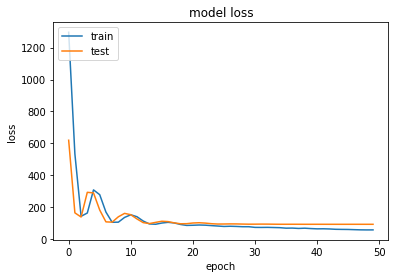

In [40]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
#get Predictions
predictions = model.predict(feature_valid)



In [42]:
predictions.shape

(300, 1)

In [43]:
predictions

array([[36.992714],
       [37.114098],
       [37.161194],
       [39.611572],
       [37.31219 ],
       [33.464546],
       [35.84517 ],
       [34.062622],
       [34.82707 ],
       [38.081123],
       [38.520897],
       [40.871994],
       [36.841484],
       [38.146675],
       [35.559067],
       [39.707325],
       [40.931023],
       [41.22303 ],
       [37.773483],
       [35.4188  ],
       [37.02735 ],
       [32.031425],
       [41.18049 ],
       [35.76033 ],
       [37.60514 ],
       [43.399216],
       [34.671265],
       [41.349957],
       [38.276924],
       [35.077904],
       [34.39525 ],
       [40.08418 ],
       [32.363846],
       [36.33713 ],
       [33.649776],
       [36.689976],
       [37.822693],
       [41.37462 ],
       [34.28071 ],
       [37.4327  ],
       [35.673424],
       [34.97293 ],
       [32.047226],
       [33.368446],
       [36.864586],
       [36.93313 ],
       [38.071445],
       [35.25391 ],
       [36.403946],
       [37.538834],


In [61]:
# extract validartion 
_,valid_image,_ ,_ = train_test_split(data_sample.image_names,y,test_size=0.3,random_state=42)


15865.jpg



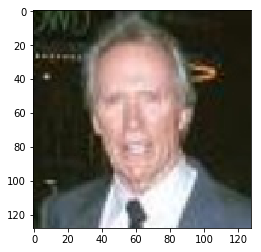

In [62]:
image_name = rng.choice(valid_image)
print(image_name)
img = plt.imread(imagePath + image_name)
# Plot the empty figure
fig = plt.figure()
# Plot the image
plt.imshow(img)

print()

In [68]:
valid_image.head()

521     4096.jpg
737     7924.jpg
740    19748.jpg
660    12930.jpg
411     5096.jpg
Name: image_names, dtype: object

In [77]:
valid_image[valid_image=='4096.jpg'].index[0]
#valid_image.index[0]

521

In [64]:
#Plot the Predicted values vs the actual values

# Read random data and plot it's image
image_name = rng.choice(valid_image)
#image_name = valid_image[idx]
print(image_name)

# Get the actual Values
index = valid_image[valid_image=='4096.jpg'].index[0]
pred_age = predictions[idx]


# read the Image
img = plt.imread(imagePath + image_name)
# Plot the empty figure
fig = plt.figure()
# Plot the image
plt.imshow(img)

# Plot Target

# Plot the predictions


# Print the shape of image
print('The shape of the is',img.shape)
plt.show()



6626.jpg


IndexError: index 7270 is out of bounds for axis 0 with size 300

In [55]:
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('X_train', 421478544),
 ('X_valid', 180633744),
 ('data', 1021723),
 ('img', 602240),
 ('data_sample', 73544),
 ('y_train', 5712),
 ('y_valid', 2512),
 ('Dense', 2000),
 ('Sequential', 2000),
 ('Dropout', 1464),
 ('EarlyStopping', 1464),
 ('InputLayer', 1464),
 ('predictions', 1312),
 ('Adam', 1184),
 ('VGG16', 136),
 ('preprocess_input', 136),
 ('train_test_split', 136),
 ('feature_train', 112),
 ('feature_valid', 112),
 ('y', 112),
 ('imagePath', 94),
 ('csvPath', 87),
 ('image', 80),
 ('np', 80),
 ('pd', 80),
 ('plt', 80),
 ('rng', 72),
 ('dataFile', 58),
 ('adam', 56),
 ('base_model', 56),
 ('estop', 56),
 ('fig', 56),
 ('history', 56),
 ('model', 56),
 ('idx', 32),
 ('max_value', 28),
 ('seed', 28)]

(300, 224, 224, 3)